## An overview when a city will be packt.
Loading the data and Imports. Hier you have to change the path to the data on your computer.

In [34]:
import pandas
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

copenhagen = pandas.read_csv("../../Data/Copenhagen/calendar.csv")
oslo = pandas.read_csv("../../Data/Oslo/calendar.csv")
stockholm = pandas.read_csv("../../Data/Stockholm/calendar.csv")

Make sure that the data is complete and get a first overview.

In [35]:
copenhagen.isna().sum().sort_values(ascending=False)
oslo.isna().sum().sort_values(ascending=False)
stockholm.isna().sum().sort_values(ascending=False)

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

If you see just 0, that means that there are no empty fields. Okay? Than let's move on and get an overview over the data.

In [36]:
copenhagen.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6983,2022-09-24,f,$953.00,$953.00,3.0,15.0
1,6983,2022-09-25,f,$877.00,$877.00,3.0,15.0
2,6983,2022-09-26,f,$877.00,$877.00,3.0,15.0
3,6983,2022-09-27,f,$877.00,$877.00,3.0,15.0
4,6983,2022-09-28,f,$877.00,$877.00,3.0,15.0


Now we have an overview over the data, and we want to create a pivot table that has the days a rows and each apartment as a column.
The values are f == False and t == True. In my version of the Data it looks like that the calendar shows more than a year but no values are there.
In that case I can see a NaN. I also have an issue with the visualization of the Data. I will leave that here for now.

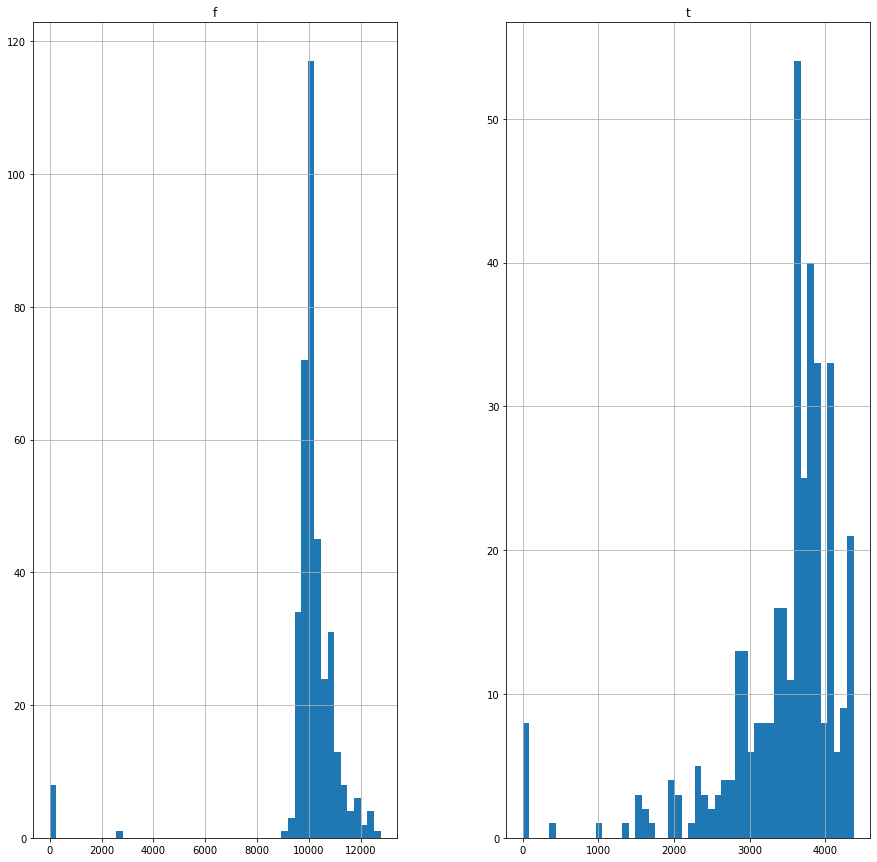

In [37]:
copenhagenPivot = copenhagen.pivot(index="date", columns="listing_id" , values="available")
copenhagenDays = pandas.get_dummies(copenhagenPivot, prefix_sep='', prefix='').sum(axis=1, level=0)
copenhagenDays.hist(bins=50, figsize=(15,15))
plt.show()

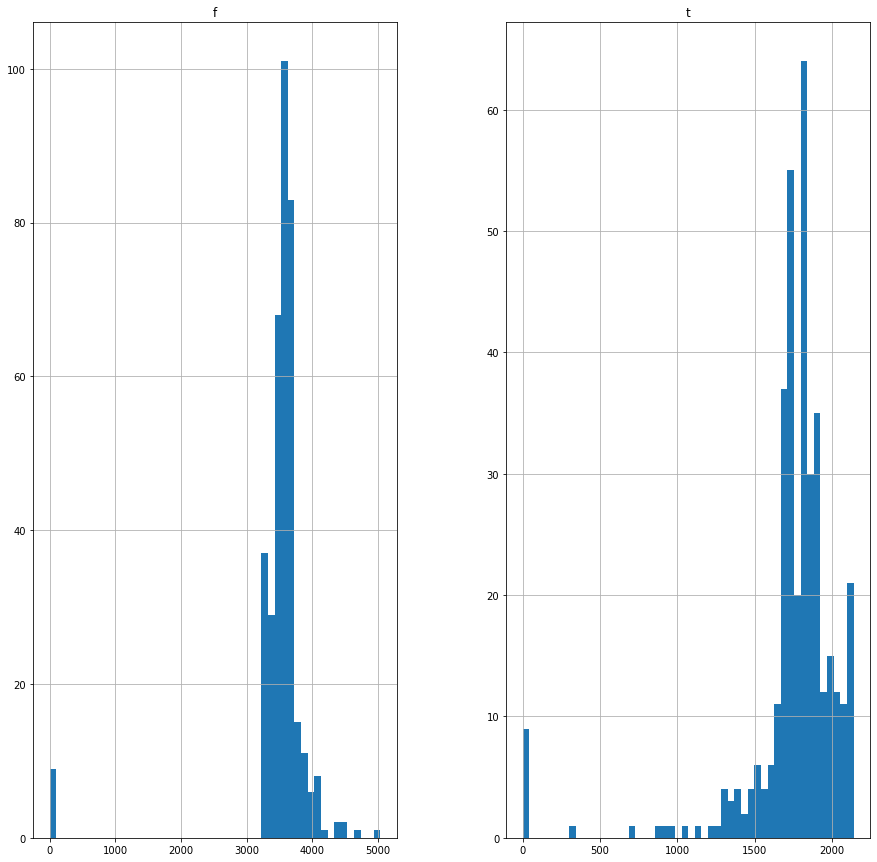

In [38]:
osloPivot = oslo.pivot(index="date", columns="listing_id", values="available")
osloDays = pandas.get_dummies(osloPivot, prefix_sep='', prefix='').sum(axis=1, level=0)
osloDays.hist(bins=50, figsize=(15,15))
plt.show()

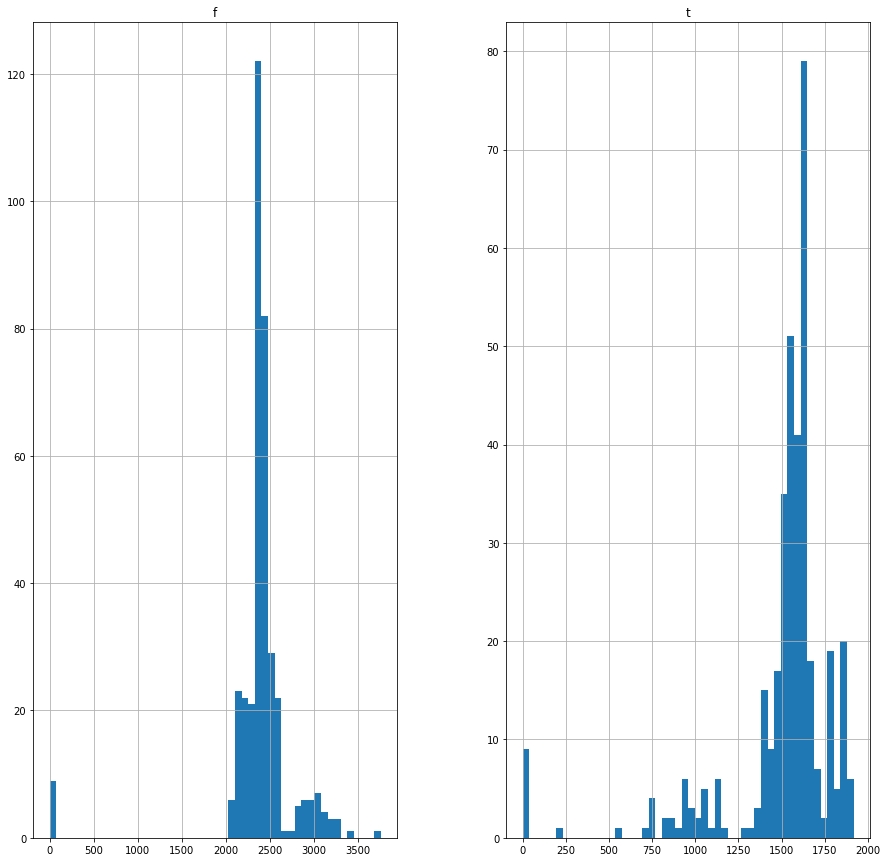

In [39]:
stockholmPivot = stockholm.pivot(index="date", columns="listing_id", values="available")
stockholmDays = pandas.get_dummies(stockholmPivot, prefix_sep='', prefix='').sum(axis=1, level=0)
stockholmDays.hist(bins=50, figsize=(15,15))
plt.show()